<H1><center><B> Sales Analysis </B></center></H1>

We have answered these 5 questions through our data analysis mainly using pandas and matplotlib library.

Q1. What is the overall sales trend? <br>
Q2. Which are the Top 10 products by sales?<br>
Q3. Which are the Most Selling Products?<br>
Q4. Which is the most preferred Ship Mode?<br>
Q5. Which are the Most Profitable Category and Sub-Category?


In [1]:
import pandas as pd

import matplotlib.pyplot as plt

%matplotlib inline

import seaborn as sns

<H3> import data set </H3>

In [2]:
df = pd.read_excel('superstore_sales.xlsx')

In [3]:
df.head()

,order_id,order_date,ship_date,ship_mode,customer_name,segment,state,country,market,region,...,category,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,year
0,AG-2011-2040,2011-01-01,2011-01-06,Standard Class,Toby Braunhardt,Consumer,Constantine,Algeria,Africa,Africa,...,Office Supplies,Storage,"Tenex Lockers, Blue",408.300,2,0.0,106.140,35.46,Medium,2011
1,IN-2011-47883,2011-01-01,2011-01-08,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Office Supplies,Supplies,"Acme Trimmer, High Speed",120.366,3,0.1,36.036,9.72,Medium,2011
2,HU-2011-1220,2011-01-01,2011-01-05,Second Class,Annie Thurman,Consumer,Budapest,Hungary,EMEA,EMEA,...,Office Supplies,Storage,"Tenex Box, Single Width",66.120,4,0.0,29.640,8.17,High,2011
3,IT-2011-3647632,2011-01-01,2011-01-05,Second Class,Eugene Moren,Home Office,Stockholm,Sweden,EU,North,...,Office Supplies,Paper,"Enermax Note Cards, Premium",44.865,3,0.5,-26.055,4.82,High,2011
4,IN-2011-47883,2011-01-01,2011-01-08,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",113.670,5,0.1,37.770,4.70,Medium,2011


In [4]:
df.tail()

,order_id,order_date,ship_date,ship_mode,customer_name,segment,state,country,market,region,...,category,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,year
51285,CA-2014-115427,2014-12-31,2015-01-04,Standard Class,Erica Bern,Corporate,California,United States,US,West,...,Office Supplies,Binders,"Cardinal Slant-D Ring Binder, Heavy Gauge Vinyl",13.904,2,0.2,4.5188,0.890,Medium,2014
51286,MO-2014-2560,2014-12-31,2015-01-05,Standard Class,Liz Preis,Consumer,Souss-Massa-Draâ,Morocco,Africa,Africa,...,Office Supplies,Binders,"Wilson Jones Hole Reinforcements, Clear",3.990,1,0.0,0.4200,0.490,Medium,2014
51287,MX-2014-110527,2014-12-31,2015-01-02,Second Class,Charlotte Melton,Consumer,Managua,Nicaragua,LATAM,Central,...,Office Supplies,Labels,"Hon Color Coded Labels, 5000 Label Set",26.400,3,0.0,12.3600,0.350,Medium,2014
51288,MX-2014-114783,2014-12-31,2015-01-06,Standard Class,Tamara Dahlen,Consumer,Chihuahua,Mexico,LATAM,North,...,Office Supplies,Labels,"Hon Legal Exhibit Labels, Alphabetical",7.120,1,0.0,0.5600,0.199,Medium,2014
51289,CA-2014-156720,2014-12-31,2015-01-04,Standard Class,Jill Matthias,Consumer,Colorado,United States,US,West,...,Office Supplies,Fasteners,Bagged Rubber Bands,3.024,3,0.2,-0.6048,0.170,Medium,2014


In [5]:
df.shape

(51290, 21)

In [6]:
#columns in data set

df.columns

Index(['order_id', 'order_date', 'ship_date', 'ship_mode', 'customer_name',
       'segment', 'state', 'country', 'market', 'region', 'product_id',
       'category', 'sub_category', 'product_name', 'sales', 'quantity',
       'discount', 'profit', 'shipping_cost', 'order_priority', 'year'],
      dtype='object')

In [7]:
#summary about columns 

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 21 columns):
order_id          51290 non-null object
order_date        51290 non-null datetime64[ns]
ship_date         51290 non-null datetime64[ns]
ship_mode         51290 non-null object
customer_name     51290 non-null object
segment           51290 non-null object
state             51290 non-null object
country           51290 non-null object
market            51290 non-null object
region            51290 non-null object
product_id        51290 non-null object
category          51290 non-null object
sub_category      51290 non-null object
product_name      51290 non-null object
sales             51290 non-null float64
quantity          51290 non-null int64
discount          51290 non-null float64
profit            51290 non-null float64
shipping_cost     51290 non-null float64
order_priority    51290 non-null object
year              51290 non-null int64
dtypes: datetime64[ns](2), float6

In [9]:
# check missing values

df.isnull().sum()

order_id          0
order_date        0
ship_date         0
ship_mode         0
customer_name     0
segment           0
state             0
country           0
market            0
region            0
product_id        0
category          0
sub_category      0
product_name      0
sales             0
quantity          0
discount          0
profit            0
shipping_cost     0
order_priority    0
year              0
dtype: int64

In [13]:
#descriptive statistics summary

df.describe()

,sales,quantity,discount,profit,shipping_cost,year
count,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000
mean,246.490581,3.476545,0.142908,28.641740,26.375818,2012.777208
std,487.565361,2.278766,0.212280,174.424113,57.296810,1.098931
min,0.444000,1.000000,0.000000,-6599.978000,0.002000,2011.000000
25%,30.758625,2.000000,0.000000,0.000000,2.610000,2012.000000
50%,85.053000,3.000000,0.000000,9.240000,7.790000,2013.000000
75%,251.053200,5.000000,0.200000,36.810000,24.450000,2014.000000
max,22638.480000,14.000000,0.850000,8399.976000,933.570000,2014.000000


<H1> Exploratory Data Analysis

 <h4> WHAT IS THE OVERALL SALES TREND?

In [36]:
df['order_date'].min()

Timestamp('2011-01-01 00:00:00')

In [15]:
df['order_date'].max()

Timestamp('2014-12-31 00:00:00')

In [18]:
#getting month year from data set

df['month_year']=df['order_date'].apply(lambda x: x.strftime('%y-%m'))

In [21]:
df["month_year"]

0        11-01
1        11-01
2        11-01
3        11-01
4        11-01
         ...  
51285    14-12
51286    14-12
51287    14-12
51288    14-12
51289    14-12
Name: month_year, Length: 51290, dtype: object

In [22]:
df.groupby('month_year').sum()

,sales,quantity,discount,profit,shipping_cost,year
month_year,,,,,,
11-01,98898.48886,1463,68.758,8321.80096,10544.78800,870763
11-02,91152.15698,1224,52.252,12417.90698,10681.16300,760158
11-03,145729.36736,1836,74.212,15303.56826,13096.18550,1083929
11-04,116915.76418,2020,80.782,12902.32438,12954.52000,1134204
11-05,146747.83610,2013,82.382,12183.82870,16443.20600,1138226
11-06,215207.38022,3112,159.534,23415.24702,23813.10900,1844087
11-07,115510.41912,1774,80.086,5585.00352,11844.47600,995445
11-08,207581.49122,3035,121.462,23713.66772,22001.13600,1765658
11-09,290214.45534,3707,137.678,35776.88394,29664.85100,2115572


In [25]:
df.groupby('month_year').sum()['sales'].reset_index()

,month_year,sales
0,11-01,98898.48886
1,11-02,91152.15698
2,11-03,145729.36736
3,11-04,116915.76418
4,11-05,146747.83610
5,11-06,215207.38022
6,11-07,115510.41912
7,11-08,207581.49122
8,11-09,290214.45534
9,11-10,199071.26404


In [26]:
df_trend=df.groupby('month_year').sum()['sales'].reset_index()

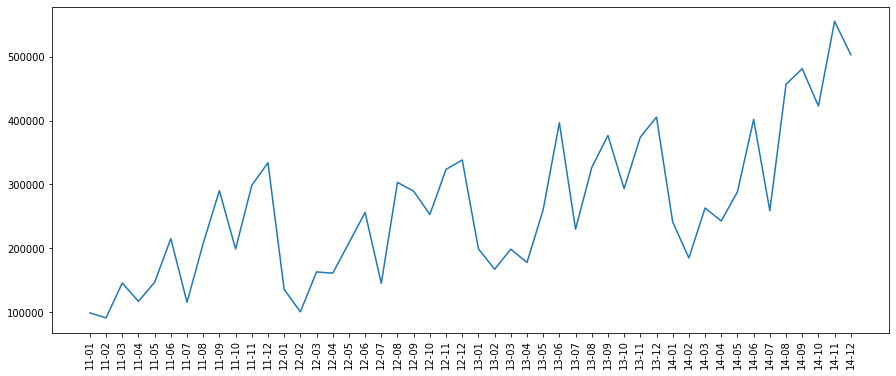

In [33]:
plt.figure(figsize=(15,6))
plt.plot(df_trend['month_year'],df_trend['sales'])
plt.xticks(rotation="vertical", size="10")
plt.show()

<H4> Which are the Top 10 products by sales?

In [46]:
df.groupby('product_name').sum()['sales']

product_name
"While you Were Out" Message Book, One Form per Page                                                     25.228
#10 Gummed Flap White Envelopes, 100/Box                                                                 41.300
#10 Self-Seal White Envelopes                                                                           108.682
#10 White Business Envelopes,4 1/8 x 9 1/2                                                              488.904
#10- 4 1/8" x 9 1/2" Recycled Envelopes                                                                 286.672
                                                                                                         ...   
iKross Bluetooth Portable Keyboard + Cell Phone Stand Holder + Brush for Apple iPhone 5S 5C 5, 4S 4     477.660
iOttie HLCRIO102 Car Mount                                                                              215.892
iOttie XL Car Mount                                                                        

In [48]:
prod_sales=pd.DataFrame(df.groupby('product_name').sum()['sales'])

In [49]:
prod_sales

,sales
product_name,
"""While you Were Out"" Message Book, One Form per Page",25.228
"#10 Gummed Flap White Envelopes, 100/Box",41.300
#10 Self-Seal White Envelopes,108.682
"#10 White Business Envelopes,4 1/8 x 9 1/2",488.904
"#10- 4 1/8"" x 9 1/2"" Recycled Envelopes",286.672
...,...
"iKross Bluetooth Portable Keyboard + Cell Phone Stand Holder + Brush for Apple iPhone 5S 5C 5, 4S 4",477.660
iOttie HLCRIO102 Car Mount,215.892
iOttie XL Car Mount,223.888


In [55]:
prod_sales=prod_sales.sort_values('sales',ascending=False)

In [57]:
#Top 10 products

prod_sales[0:10]

,sales
product_name,
"Apple Smart Phone, Full Size",86935.7786
"Cisco Smart Phone, Full Size",76441.5306
"Motorola Smart Phone, Full Size",73156.3030
"Nokia Smart Phone, Full Size",71904.5555
Canon imageCLASS 2200 Advanced Copier,61599.8240
"Hon Executive Leather Armchair, Adjustable",58193.4841
"Office Star Executive Leather Armchair, Adjustable",50661.6840
"Harbour Creations Executive Leather Armchair, Adjustable",50121.5160
"Samsung Smart Phone, Cordless",48653.4600


<H4> Which are the Most Selling Products?

In [71]:
most_sell_prod=pd.DataFrame(df.groupby('product_name').sum()['quantity'])

In [74]:
most_sell_prod=most_sell_prod.sort_values('quantity',ascending=False)

In [75]:
most_sell_prod[0:10]

,quantity
product_name,
Staples,876
"Cardinal Index Tab, Clear",337
"Eldon File Cart, Single Width",321
"Rogers File Cart, Single Width",262
"Sanford Pencil Sharpener, Water Color",259
"Stockwell Paper Clips, Assorted Sizes",253
"Avery Index Tab, Clear",252
"Ibico Index Tab, Clear",251
"Smead File Cart, Single Width",250


<H4> Which is the most preferred Ship Mode?

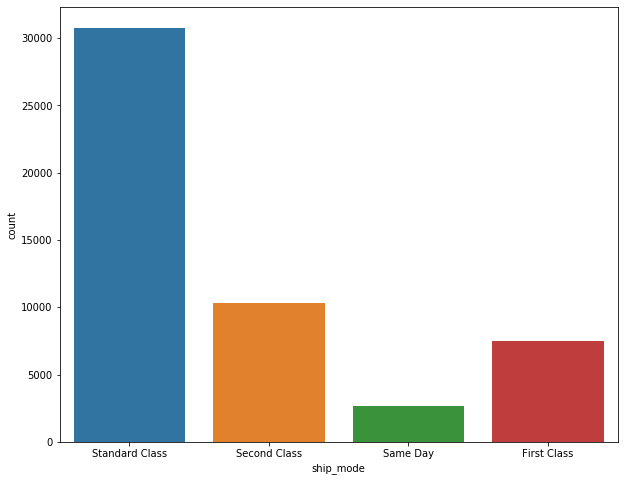

In [79]:

plt.figure(figsize=(10,8))
sns.countplot(df['ship_mode'])
plt.show()


<H4> Which are the Most Profitable Category and Sub-Category?

In [84]:
cat_subcat = pd.DataFrame(df.groupby(['category', 'sub_category']).sum()['profit'])

In [85]:
cat_subcat

profit
category        sub_category              
Furniture       Bookcases     161924.41950
                Chairs        141973.79750
                Furnishings    46967.42550
                Tables        -64083.38870
Office Supplies Appliances    141680.58940
                Art            57953.91090
                Binders        72449.84600
                Envelopes      29601.11630
                Fasteners      11525.42410
                Labels         15010.51200
                Paper          59207.68270
                Storage       108461.48980
                Supplies       22583.26310
Technology      Accessories   129626.30620
                Copiers       258567.54818
                Machines       58867.87300
                Phones        216717.00580

In [86]:
cat_subcat.sort_values(['category','profit'], ascending=False)

profit
category        sub_category              
Technology      Copiers       258567.54818
                Phones        216717.00580
                Accessories   129626.30620
                Machines       58867.87300
Office Supplies Appliances    141680.58940
                Storage       108461.48980
                Binders        72449.84600
                Paper          59207.68270
                Art            57953.91090
                Envelopes      29601.11630
                Supplies       22583.26310
                Labels         15010.51200
                Fasteners      11525.42410
Furniture       Bookcases     161924.41950
                Chairs        141973.79750
                Furnishings    46967.42550
                Tables        -64083.38870